In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import seaborn as sns
import numpy as np

In [2]:
import os

print("Current Working Directory:", os.getcwd())


Current Working Directory: /home/augre/ar_star_ws/src/ar-star/data/tahri_2023/post_tlx


In [3]:
# import csv
data_path = 'nasa_tlx_results.csv'

# Load SUS data from CSV
try:
    data = pd.read_csv(data_path)
except FileNotFoundError:
    print(f"Error: File '{data_path}' not found.")
    exit()


In [11]:
# parse data

# get nasa tlx measures only
categories = data.columns.values[2:] 
data_grouped = data.groupby('Modality')

# init
modalities = ['shape', 'highlight', 'lasso']
modes = [[] for _ in modalities]

# print data
for i, cat in enumerate(categories):
    print('\n\n' + cat + '==================================')
    print(data_grouped[cat].describe())

# loop through each modality
for i in range(0, len(data_grouped)):
    # loop through each category in each modality
    for j, cat in enumerate(categories):
        modes[i].append(data_grouped[cat].mean()[i])



MentalDemand
          count  mean       std  min  25%   50%   75%   max
Modality                                                   
0           5.0   9.2  2.774887  5.0  8.0  10.0  11.0  12.0
1           5.0   7.0  2.549510  4.0  6.0   7.0   7.0  11.0
2           5.0   8.6  3.209361  6.0  7.0   7.0   9.0  14.0


PhysicalDemand
          count  mean       std  min  25%  50%  75%   max
Modality                                                 
0           5.0   5.4  2.509980  3.0  3.0  6.0  6.0   9.0
1           5.0   6.0  4.301163  2.0  3.0  6.0  6.0  13.0
2           5.0   5.0  3.937004  2.0  2.0  3.0  7.0  11.0


TemporalDemand
          count  mean       std  min  25%  50%  75%  max
Modality                                                
0           5.0   5.0  3.082207  2.0  2.0  5.0  7.0  9.0
1           5.0   3.6  1.673320  2.0  2.0  4.0  4.0  6.0
2           5.0   4.0  2.000000  2.0  2.0  4.0  6.0  6.0


Performance
          count  mean       std  min  25%  50%  75%   max
Moda

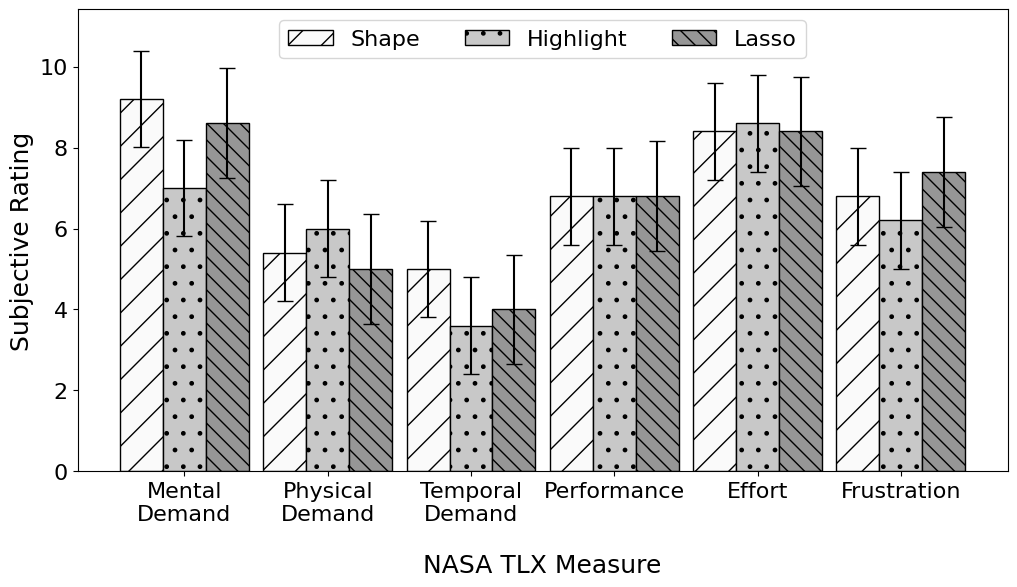

In [5]:
plt.figure(figsize=(12,6))

# Set up the bar positions
bar_width = 0.3
index = np.arange(len(categories))

# Calculate 95% confidence intervals (assuming normally distributed data)
conf_interval = 1.96  # For a 95% confidence interval

errors = []
for i, values in enumerate(modes):
    errors.append(conf_interval * np.std(values) / np.sqrt(len(values)))

# Create the grouped bars with error bars
plt.bar(index - bar_width, modes[0], bar_width, yerr=errors[0], capsize=6, label='Shape', color='#fafafa', hatch='/', edgecolor='black')
plt.bar(index, modes[1], bar_width, yerr=errors[1], capsize=6, label='Highlight', color='#c8c8c8', hatch='.', edgecolor='black')
plt.bar(index + bar_width, modes[2], bar_width, yerr=errors[2], capsize=6, label='Lasso', color='#969696', hatch='\\\\', edgecolor='black')

categories_clean = ['Mental\nDemand\n', 'Physical\nDemand\n', 'Temporal\nDemand\n', 'Performance', 'Effort', 'Frustration']
# Customize the plot
font_size = 16
plt.ylabel('Subjective Rating', fontsize=font_size+2)
plt.xlabel('NASA TLX Measure', fontsize=font_size+2)
plt.xticks(index, categories_clean, fontsize=font_size)
plt.yticks(fontsize=font_size)
y_min, y_max = plt.ylim()
plt.ylim(y_min, y_max + 0.5)
plt.legend(fontsize=font_size, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3)


# Save as SVG and PNG
plt.savefig('nasa_tlx_results.svg', format='svg',bbox_inches='tight')
plt.savefig('nasa_tlx_results.png', format='png', dpi=300,bbox_inches='tight')  # Adjust dpi for higher resolution if needed

# Show the plot
plt.show()

In [6]:
# Perform ANOVA for statistical comparison

for i, cat in enumerate(categories) :
    modality_groups = [subset[cat] for modality, subset in data_grouped]
    f_statistic, p_value = f_oneway(*modality_groups)
    # Display ANOVA results
    print("\nANOVA Results for " + cat)
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")


ANOVA Results for MentalDemand
F-statistic: 0.7918367346938776
P-value: 0.47531779828011855

ANOVA Results for PhysicalDemand
F-statistic: 0.09429280397022331
P-value: 0.9106837859091178

ANOVA Results for TemporalDemand
F-statistic: 0.4785276073619632
P-value: 0.6310294375008224

ANOVA Results for Performance
F-statistic: 4.938786880844046e-48
P-value: 1.0

ANOVA Results for Effort
F-statistic: 0.005988023952095808
P-value: 0.9940328367586424

ANOVA Results for Frustration
F-statistic: 0.13775510204081634
P-value: 0.8726702411897505
